In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('forest_fire.csv')

In [3]:
df = df.drop('Area', axis=1)

In [4]:
df.head()

,Oxygen,Temperature,Humidity,Fire Occurrence
0,40,45,20,1
1,50,30,10,1
2,10,20,70,0
3,60,45,70,1
4,30,48,10,1


In [5]:
sum1=df.isnull().sum()
print(sum1)

Oxygen             0
Temperature        0
Humidity           0
Fire Occurrence    0
dtype: int64


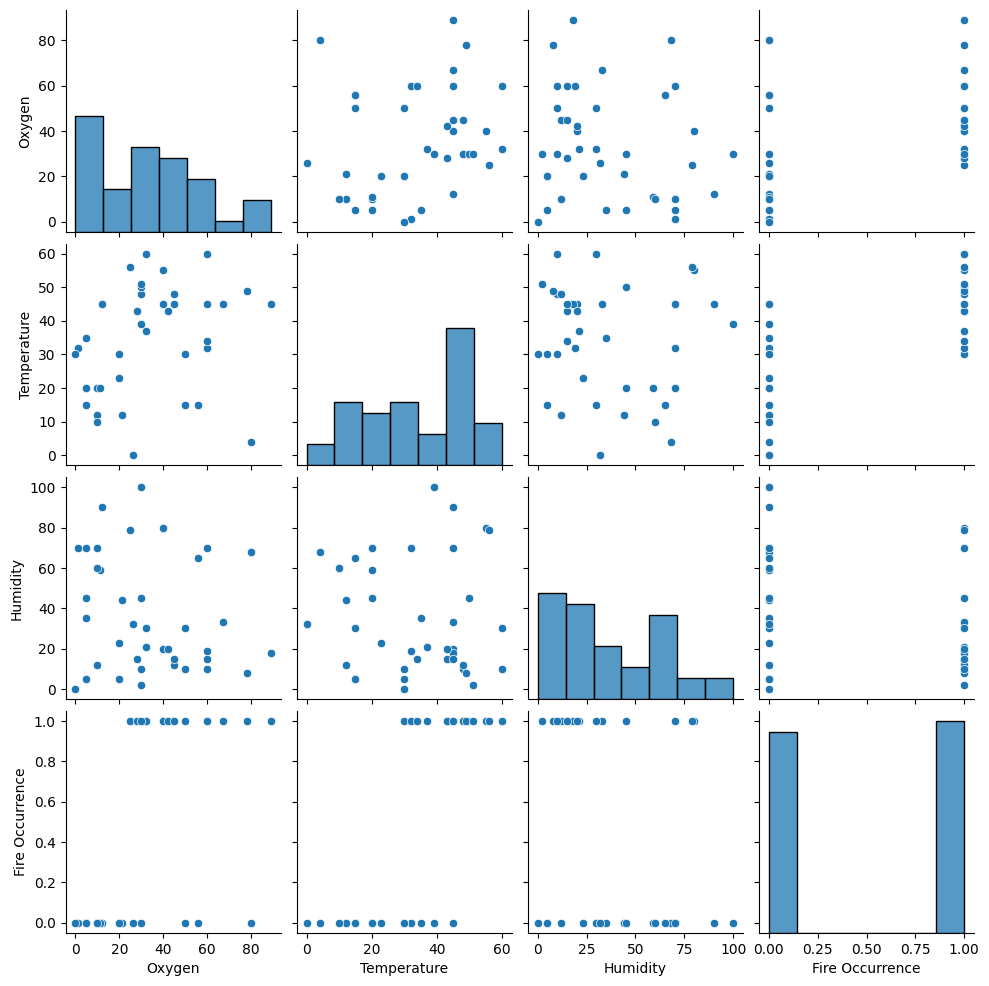

In [6]:
import seaborn as sns
sns.pairplot(df)

In [7]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [8]:
x

,Oxygen,Temperature,Humidity
0,40,45,20
1,50,30,10
2,10,20,70
3,60,45,70
4,30,48,10
5,50,15,30
6,5,35,35
7,5,20,70
8,60,32,19
9,30,50,45


In [9]:
y

0     1
1     1
2     0
3     1
4     1
5     0
6     0
7     0
8     1
9     1
10    1
11    0
12    0
13    0
14    1
15    0
16    1
17    0
18    1
19    0
20    1
21    1
22    0
23    1
24    1
25    1
26    0
27    0
28    0
29    0
30    1
31    1
32    0
33    0
34    1
35    1
36    0
37    0
38    1
Name: Fire Occurrence, dtype: int64

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [12]:
x_train=scaler.fit_transform(x_train)

In [13]:
x_test=scaler.fit_transform(x_test)

In [14]:
import pickle 
pickle.dump(scaler,open('scaler_model.pkl','wb'))
scaler=pickle.load(open('scaler_model.pkl','rb'))

In [15]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [16]:
y_pred=model.predict(x_test)

In [17]:
pickle.dump(model,open('predict_model.pkl','wb'))
model=pickle.load(open('predict_model.pkl','rb'))

In [18]:
from sklearn.metrics import accuracy_score


In [19]:
print(accuracy_score(y_test,y_pred))

1.0


In [20]:
residuals=y_test-y_pred

In [21]:
print(residuals)

19    0
9     0
14    0
0     0
2     0
29    0
13    0
35    0
Name: Fire Occurrence, dtype: int64


In [22]:
scaler.transform(x.iloc[[0]].values.reshape(1, -1))

c:\Users\ADMIN\OneDrive\Documents\Forest_fire_predict\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.44348466,  0.73868713, -0.67079356]])

In [23]:
model.predict(scaler.transform(x.iloc[[0]].values.reshape(1, -1)))

c:\Users\ADMIN\OneDrive\Documents\Forest_fire_predict\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)